In this project we will use Decision Trees, Random Forest Classifier and a Deep Learning algorithm to predict whether a patient has heart disease. We will use continuous and categorical data from the **[UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/index.php)** to predict whether or not a patient has **[heart disease](https://archive.ics.uci.edu/ml/datasets/Heart+Disease)**:

In [1]:
import pandas as pd # to load and manipulate data and for One-Hot Encoding
import numpy as np # to calculate the mean and standard deviation
import matplotlib.pyplot as plt # to draw graphs
import seaborn as sns # to draw graphs
from sklearn.tree import DecisionTreeClassifier # to build a classification tree
from sklearn.tree import plot_tree # to draw a classification tree
from sklearn.model_selection import train_test_split # to split data into training and testing sets
from sklearn.model_selection import cross_val_score # for cross validation
from sklearn.metrics import confusion_matrix # to create a confusion matrix
from sklearn.metrics import plot_confusion_matrix # to draw a confusion matrix
from sklearn.metrics import classification_report,confusion_matrix

In [2]:
## DATA already downloaded, we can load the file...
df = pd.read_csv('processed.cleveland.data', 
                 header=None)
df.columns = ['age', 
              'sex', 
              'cp', 
              'restbp', 
              'chol', 
              'fbs', 
              'restecg', 
              'thalach', 
              'exang', 
              'oldpeak', 
              'slope', 
              'ca', 
              'thal', 
              'hd']

We see that instead of nice column names, we just have column numbers.  Since nice column names would make it easier to know how to format the data, let's replace the column numbers with the following column names:
- **age**The person's age in years,
- **sex**The person's sex (1 = male, 0 = female),
- **cp** The chest pain experienced (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic
- **restbp**, resting blood pressure (in mm Hg)
- **chol**, serum cholesterol in mg/dl
- **fbs**, The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)
- **restecg**, Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)
- **thalach**,  maximum heart rate achieved
- **exang**, Exercise induced angina (1 = yes; 0 = no)
- **oldpeak**, ST depression induced by exercise relative to rest ('ST' relates to positions on the ECG plot
- **slope**, the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping).
- **ca**, number of major vessels (0-3) colored by fluoroscopy
- **thal**, A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)
- **hd**, Heart disease

In [3]:
df.head()

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [4]:
df.dtypes

age        float64
sex        float64
cp         float64
restbp     float64
chol       float64
fbs        float64
restecg    float64
thalach    float64
exang      float64
oldpeak    float64
slope      float64
ca          object
thal        object
hd           int64
dtype: object

In [5]:
df['ca'].unique()

array(['0.0', '3.0', '2.0', '1.0', '?'], dtype=object)

In [6]:
df['thal'].unique()

array(['6.0', '3.0', '7.0', '?'], dtype=object)

In [7]:
(df.loc[df['ca']=='?'])

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
166,52.0,1.0,3.0,138.0,223.0,0.0,0.0,169.0,0.0,0.0,1.0,?,3.0,0
192,43.0,1.0,4.0,132.0,247.0,1.0,2.0,143.0,1.0,0.1,2.0,?,7.0,1
287,58.0,1.0,2.0,125.0,220.0,0.0,0.0,144.0,0.0,0.4,2.0,?,7.0,0
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,?,3.0,0


In [8]:
 (df.loc[df['thal']=='?'])

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
87,53.0,0.0,3.0,128.0,216.0,0.0,2.0,115.0,0.0,0.0,1.0,0.0,?,0
266,52.0,1.0,4.0,128.0,204.0,1.0,0.0,156.0,1.0,1.0,2.0,0.0,?,2


We have only 6 rows of missing values (Around 2% of the data, so the rows are removed since it represents only a small fraction of the overall set) 

In [9]:
df_no_missing = df.loc[(df['ca'] != '?') 
                       & 
                       (df['thal'] != '?')]

In [10]:
len(df_no_missing)

297

In [11]:
df_no_missing['thal'].unique()

array(['6.0', '3.0', '7.0'], dtype=object)

In [12]:
X = df_no_missing.drop('hd',axis=1)
y = df_no_missing['hd']


In [13]:
X.dtypes

age        float64
sex        float64
cp         float64
restbp     float64
chol       float64
fbs        float64
restecg    float64
thalach    float64
exang      float64
oldpeak    float64
slope      float64
ca          object
thal        object
dtype: object

Categorical variables are converted into dummy variables. 

In [14]:
X_encoded = pd.get_dummies(X, columns=['cp', 
                                       'restecg', 
                                       'slope', 
                                       'thal'],drop_first=True)
X_encoded.head()

,age,sex,restbp,chol,fbs,thalach,exang,oldpeak,ca,cp_2.0,cp_3.0,cp_4.0,restecg_1.0,restecg_2.0,slope_2.0,slope_3.0,thal_6.0,thal_7.0
0,63.0,1.0,145.0,233.0,1.0,150.0,0.0,2.3,0.0,0,0,0,0,1,0,1,1,0
1,67.0,1.0,160.0,286.0,0.0,108.0,1.0,1.5,3.0,0,0,1,0,1,1,0,0,0
2,67.0,1.0,120.0,229.0,0.0,129.0,1.0,2.6,2.0,0,0,1,0,1,1,0,0,1
3,37.0,1.0,130.0,250.0,0.0,187.0,0.0,3.5,0.0,0,1,0,0,0,0,1,0,0
4,41.0,0.0,130.0,204.0,0.0,172.0,0.0,1.4,0.0,1,0,0,0,1,0,0,0,0


In [15]:
y.unique()

array([0, 2, 1, 3, 4], dtype=int64)

**0 in our project means no heart disease, 1,2,3,4 is some form of heart disease 4 being more severe than 1, however for our prject, we are interested in predicting any type of heart disease, hence they are all converted to 1**

In [16]:
y_not_zero_index = y > 0 # get the index for each non-zero value in y
y[y_not_zero_index] = 1  # set each non-zero value in y to 1
y.unique()               # verify that y only contains 0 and 1.

C:\anaconda\envs\ten2\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\anaconda\envs\ten2\lib\site-packages\pandas\core\generic.py:8765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


array([0, 1], dtype=int64)

**Building a preliminary classification tree, not optimised**

In [17]:
## split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, random_state=42)

## create a decisiont tree and fit it to the training data
clf_dt = DecisionTreeClassifier(random_state=42) #initialising the decision tree.
clf_dt = clf_dt.fit(X_train, y_train)

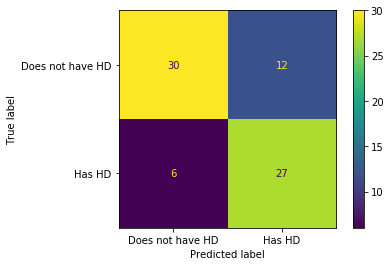

In [18]:
## plot_confusion_matrix() will run the test data down the tree and draw
## a confusion matrix.
plot_confusion_matrix(clf_dt, X_test, y_test, display_labels=["Does not have HD", "Has HD"])

In the confusion matrix, we see that of the **30 + 12 = 42** people that did not have **Heart Disease**, **30 (74%)** were correctly classified. And of the **6 + 27 = 33** people that have **Heart Disease**, **27 (81%)** were correctly classified. Can we do better? One thing that might be holding this **Classification Tree** back is that it may have **overfit** the training dataset. So let's prune the tree. Pruning solves the overfitting problem and give us better results.

In [19]:
path = clf_dt.cost_complexity_pruning_path(X_train, y_train) # determine values for alpha
ccp_alphas = path.ccp_alphas # extract different values for alpha
ccp_alphas = ccp_alphas[:-1] # exclude the maximum value for alpha

clf_dts = [] # create an array that we will put decision trees into

## now create one decision tree per value for alpha and store it in the array
for ccp_alpha in ccp_alphas:
    clf_dt = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf_dt.fit(X_train, y_train)
    clf_dts.append(clf_dt)

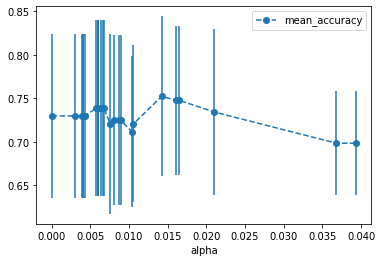

In [20]:
## create an array to store the results of each fold during cross validiation
alpha_loop_values = []

## For each candidate value for alpha, we will run 5-fold cross validation.
## Then we will store the mean and standard deviation of the scores (the accuracy) for each call
## to cross_val_score in alpha_loop_values...
for ccp_alpha in ccp_alphas:
    clf_dt = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    scores = cross_val_score(clf_dt, X_train, y_train, cv=5)
    alpha_loop_values.append([ccp_alpha, np.mean(scores), np.std(scores)])

## Now we can draw a graph of the means and standard deviations of the scores
## for each candidate value for alpha
alpha_results = pd.DataFrame(alpha_loop_values, 
                             columns=['alpha', 'mean_accuracy', 'std'])

alpha_results.plot(x='alpha', 
                   y='mean_accuracy', 
                   yerr='std', 
                   marker='o', 
                   linestyle='--')

**We can observe that alpha between 0.014 and 0.015 yields the highest accuracy.**

In [21]:
alpha_results[(alpha_results['alpha'] > 0.014)
              &
              (alpha_results['alpha'] < 0.015)]

,alpha,mean_accuracy,std
20,0.014225,0.752323,0.091956


In [22]:
ideal_ccp_alpha = alpha_results[(alpha_results['alpha'] > 0.014) 
                                & 
                                (alpha_results['alpha'] < 0.015)]['alpha']
ideal_ccp_alpha
## convert ideal_ccp_alpha from a series to a float
ideal_ccp_alpha = float(ideal_ccp_alpha)
ideal_ccp_alpha

0.014224751066856332

<a id="draw-tree"></a>
# Building, Evaluating, Drawing, and Interpreting the Final Classification Tree

Now that we have the ideal value for `alpha` we can build the final **Classification Tree** by setting `ccp_alpha=ideal_ccp_alpha`:

In [23]:
## Build and train a new decision tree, only this time use the optimal value for alpha
clf_dt_pruned = DecisionTreeClassifier(random_state=42, 
                                       ccp_alpha=ideal_ccp_alpha)
clf_dt_pruned = clf_dt_pruned.fit(X_train, y_train) 

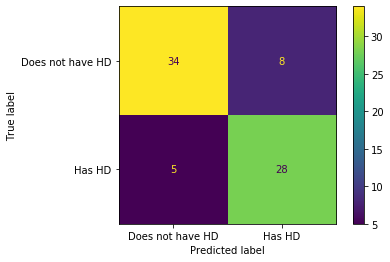

In [24]:
plot_confusion_matrix(clf_dt_pruned, 
                      X_test, 
                      y_test, 
                      display_labels=["Does not have HD", "Has HD"])

Of the **34 + 8 = 42** people that did not have heart disease, **34 (81%)** were correctly classified. This is an improvement over the full sized tree, which only correctly classified **30 (71%)** of the patients without heart disease. Of the **5 + 28 = 33** people with heart disease, **28 (85%)** were correctly classified. Again, this is an improvement over the full sized tree, which only correctly classified **27 (82%)** of the patients with heart disease. 

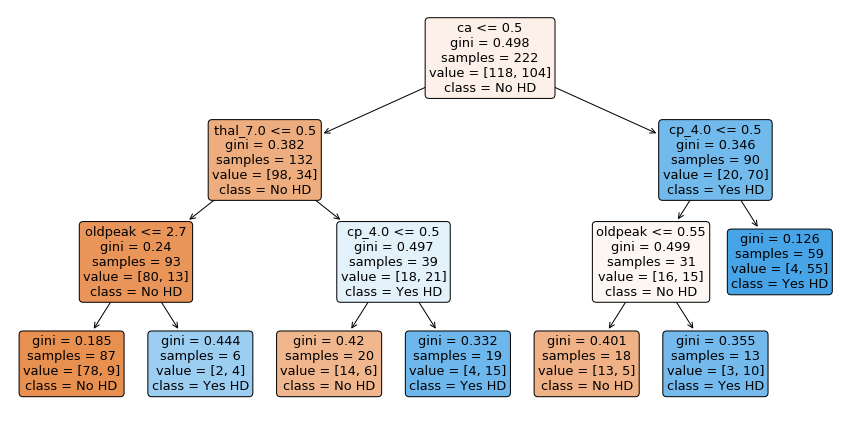

In [25]:
plt.figure(figsize=(15, 7.5))
plot_tree(clf_dt_pruned, 
          filled=True, 
          rounded=True, 
          class_names=["No HD", "Yes HD"], 
          feature_names=X_encoded.columns); 

**Now that we have fitted our model to a simple decision tree, we will try to fit using an ensemble method called Random Forest. Random Forest is one of the most common ensemble methods, which consists of a collection of Decision Trees. We’ll run multiple models on the data and use the aggregate predictions, which will be better than a single model alone.**

In [26]:
#creating the RandomForest and fitting the training data 
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(max_depth=5,n_estimators=200,ccp_alpha=ideal_ccp_alpha)
rfc.fit(X_train, y_train)

RandomForestClassifier(ccp_alpha=0.014224751066856332, max_depth=5,
                       n_estimators=200)

In [27]:
rfc_pred = rfc.predict(X_test)

In [28]:
rfc_cfm= confusion_matrix(y_test,rfc_pred)

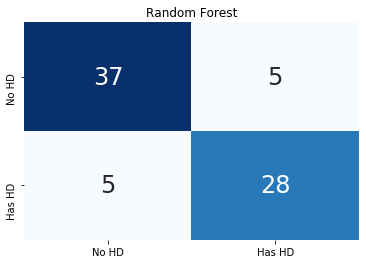

In [29]:
plt.title("Random Forest")
sns.heatmap(rfc_cfm,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24},xticklabels=['No HD','Has HD'],
            yticklabels=['No HD','Has HD'])



Of the **42 (38+4)** people that did not have heart disease, **37 (88%)** were correctly classified.
This is an improvement over decision tree which correctly classified **81%** of the patients without heart disease. Of the **5 + 28 = 33** people with heart disease, **28 (85%)** were correctly classified. It yields the same result as out modifed Decision Tree 


# Building and Fitting a Deep Learning model #


Finally, we wil try to fit a Deep Learning model to our data. Deep learning is a black box model due to their multilayer nonlinear structure, Deep Neural Networks are often criticized to be non-transparent and their predictions not traceable by humans

In [30]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.constraints import max_norm

In [31]:
from tensorflow.keras.callbacks import EarlyStopping

In [32]:
early_stop = EarlyStopping(monitor='val_loss',mode='min',patience=50,verbose=1)

In [33]:
X_train.shape

(222, 18)

In [34]:
from sklearn.preprocessing import MinMaxScaler

In [35]:
scaler = MinMaxScaler()

In [36]:
scaled_X_train = scaler.fit_transform(X_train)

In [37]:
scaled_X_test = scaler.transform(X_test)

**We are building our deep learning model with one input layer, two hidden layers and one output layer. 18 neurons are in the first input layer (which represents the number of column in our dataset), 9 and 4 neurons in the hidden layers and finally the final layer which will predict if a patient has HD or does not has HD**

In [38]:
model = Sequential()

# input layer
model.add(Dense(18,  activation='relu'))
model.add(Dropout(0.5))

# hidden layer
model.add(Dense(9, activation='relu'))
model.add(Dropout(0.5))

# hidden layer
model.add(Dense(4, activation='relu'))
model.add(Dropout(0.5))


# output layer
model.add(Dense(units=1,activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam')

In [39]:
scaled_X_train.reshape(-1)

array([0.64583333, 1.        , 0.46938776, ..., 0.        , 0.        ,
       0.        ])

In [40]:
np_y_train = y_train.values

Our training dataset is trained on the model we just built

In [41]:
model_DL = model.fit(x=scaled_X_train,y=np_y_train,epochs=250,validation_data=(scaled_X_test,y_test),batch_size=128,
         callbacks=[early_stop],verbose=0)

Validation loss being monitored, we see as we we train the data more (as epochs increase), the model learns and loss is reduced. We could potentially do more epochs,  but it would cost us more time for bigger datasets

In [42]:
losses = pd.DataFrame(model.history.history)

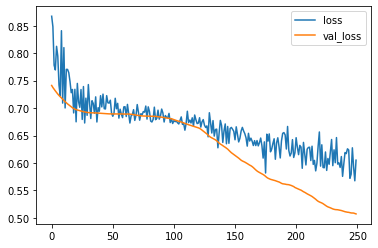

In [43]:
losses[['loss','val_loss']].plot()

From our fitted model, we predict using X_test and draw a confusion matrix

In [44]:
predictions = model.predict_classes(scaled_X_test)

In [45]:
DL_cm = confusion_matrix(y_test,predictions)

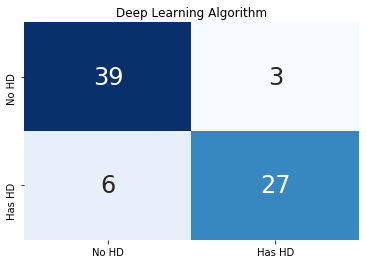

In [46]:
plt.title("Deep Learning Algorithm")
sns.heatmap(DL_cm,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24},xticklabels=['No HD','Has HD'],
            yticklabels=['No HD','Has HD'])



Of the **38 + 4 = 42** people that did not have heart disease, **39 (92%)** were correctly classified. This is an improvement over the RandomForestClassifier, which only correctly classified **38 (90%)** of the patients without heart disease. Of the **6+ 27 33** people with heart disease, **82%** were correctly classified. This is not an improvement on the RandomForestClassifier                                                        